### Linear Regression (Supervised)
1. simple lr
2. multiple lr
3. polynomial lr
4. regularisation

## Simple Linear regression

In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [70]:
placement=pd.read_csv(r"C:\Users\Admin\Downloads\placement (1).csv")

In [71]:
placement.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package(in lpa)')

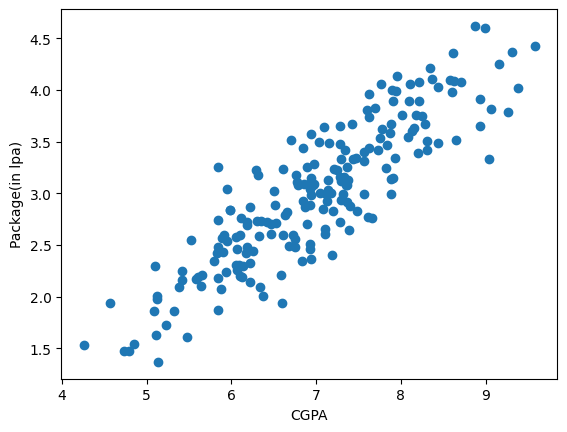

In [72]:
plt.scatter(placement['cgpa'],placement['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [73]:
X=placement.iloc[:,0:1]
y=placement.iloc[:,-1]

In [74]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [75]:
from  sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
y_train

137    3.13
163    3.91
111    2.25
123    2.30
109    4.06
       ... 
43     2.76
22     2.30
72     3.62
15     3.23
168    3.52
Name: package, Length: 160, dtype: float64

In [78]:
X_train

,cgpa
137,7.14
163,8.93
111,5.42
123,5.10
109,7.77
...,...
43,7.66
22,6.14
72,7.78
15,7.25


In [79]:
lr=LinearRegression()

In [80]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [81]:
y_train

137    3.13
163    3.91
111    2.25
123    2.30
109    4.06
       ... 
43     2.76
22     2.30
72     3.62
15     3.23
168    3.52
Name: package, Length: 160, dtype: float64

In [82]:
lr.predict(X_test.iloc[0].values.reshape(1,1)) # orignal is 3.13

c:\Users\Admin\Desktop\Arusa\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([3.89111601])

In [83]:
lr.predict(X_test.iloc[1].values.reshape(1,1))

c:\Users\Admin\Desktop\Arusa\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([3.09324469])

Text(0, 0.5, 'Package in lpa')

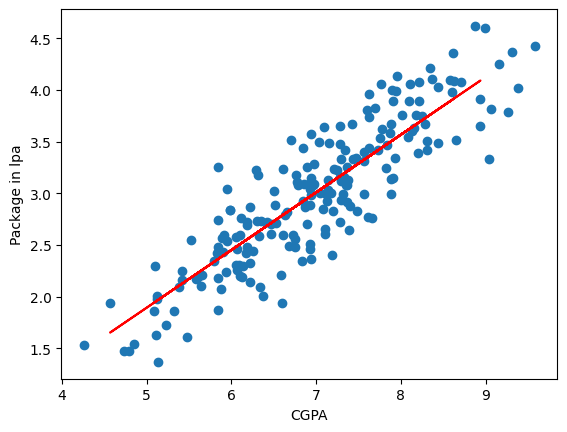

In [84]:
plt.scatter(placement['cgpa'],placement['package'])
plt.plot(X_test,lr.predict(X_test),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package in lpa')

In [85]:
lr.coef_ #Slope

array([0.55795197])

In [86]:
lr.intercept_

np.float64(-0.8961119222429144)

In [87]:
# y=mx+b  m=-0.896  b= 0.55795

#### Derivation Linear regression

we simply draw lines, and it pass through all those points and the equation of line would be **y=mx+b**
y and x = variable
- m= slope
- b = y-intercept

**How to find the value of m and b?**

1. closed-form solution (mathematical expression using a finite number of standard operations)
2. non-closed-form solution(you have to use the approximation technique to reach that value.) more usefull in higher dimensions

so to find the value of m and b, there are two ways

1. Direct formula This technique is called **OLS (ordinary least squares)**. Scikit-learn uses this technique internally to solve linear regression.
2. second technique is approximation technique called **gradient descent**

### Direct Formula
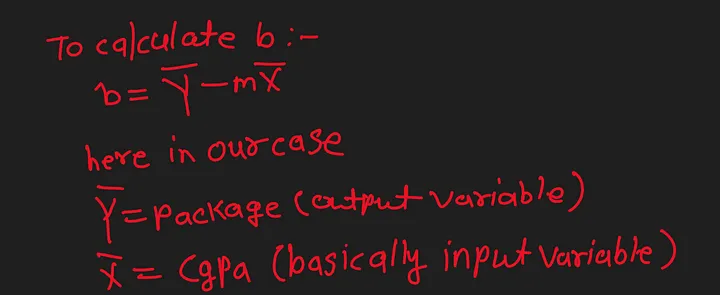
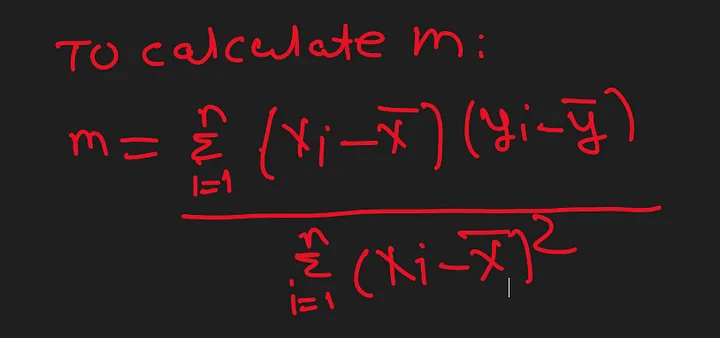
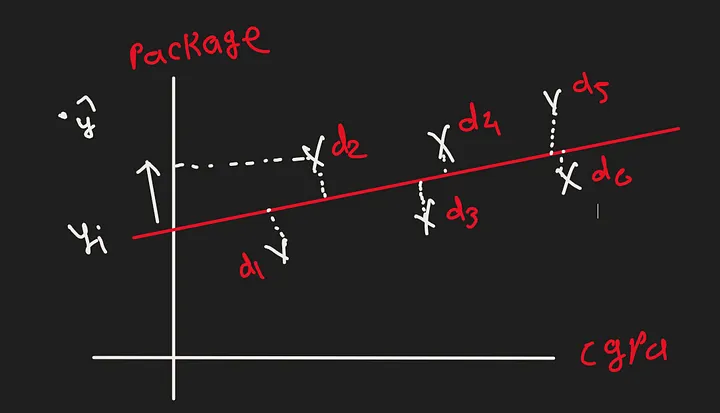

The perfect line would have passed through every point, and the distance would be zero.but the best fit line is not passing through every point.There is a slight error with respect to each point.

I want to find a line that will minimize this whole error.At the end, this error is the distance in the coordinate plane.then the total error becomes

E=d1+d2+d3+….+dn
I will add this whole by squaring because these distances, which are above and below the line, and since I have to get the total error, positive and negative start canceling each other out.
(We are squaring 1. we have to do differtiation mod diff is difficult 2. to parrallize outlier )
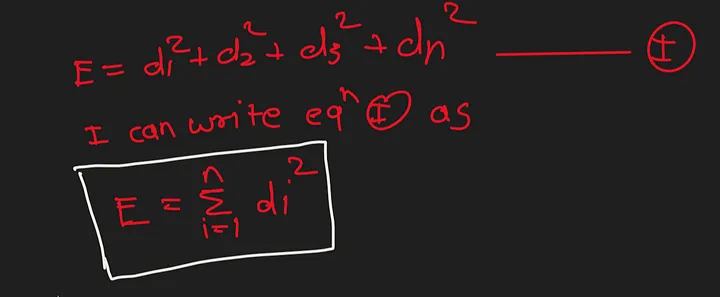

This becomes our error function.now we can say that I need value of m and b that minimizes the value of this error function.

If you consider any distance (from point to best fit line), that distance represents that point should be on that line.that distance is eroor and this error is in terms of Y for every point, eroor can be written as
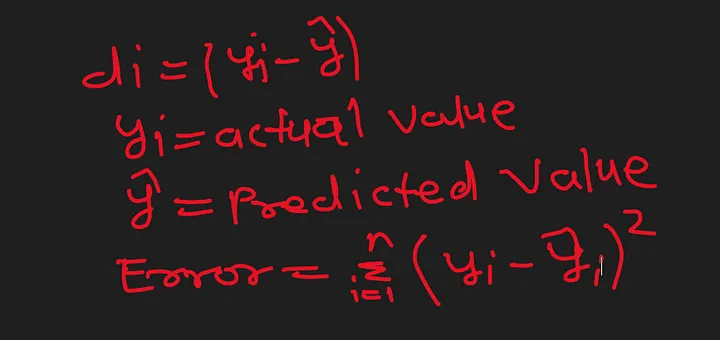

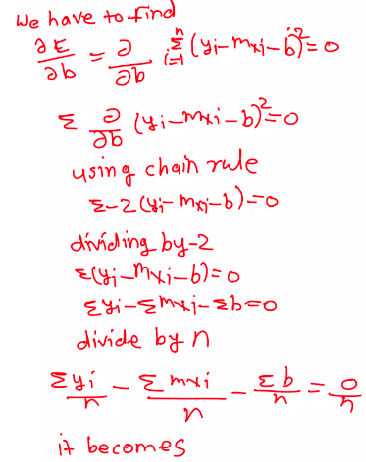
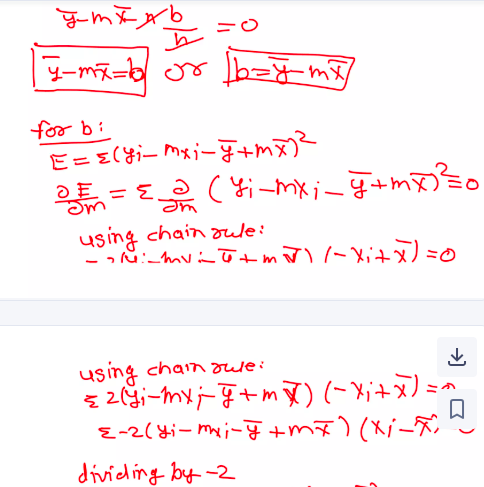
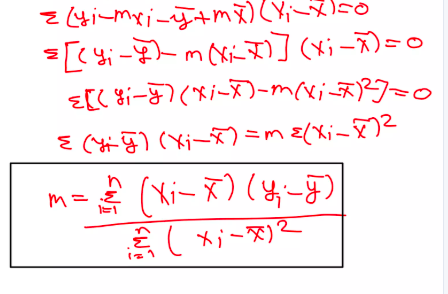

In [88]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)

## Simple LR Mycode

In [89]:
# making my own lr class
class myLR:
    def __init__(self):
        self.m=None
        self.b=None
    def fit(self,X_train,y_train):
        num=0
        den=0
        for i in range(X_train.shape[0]):
            num=num+((X_train[i]-X_train.mean())*(y_train[i]-y_train.mean()))
            den=den+((X_train[i]-X_train.mean())*(X_train[i]-X_train.mean()))
        self.m=num/den
        self.b=y_train.mean()-(self.m*X_train.mean())
        print(self.m)
        print(self.b)
    def predict(self,X_test):
        print(X_test)
        return self.m*X_test+self.b


In [90]:
type(X_train)

numpy.ndarray

In [91]:
obj=myLR()
obj.fit(X_train,y_train)

[0.55795197]
[-0.89611192]


In [92]:
X_test[0]

array([8.58])

In [93]:
print(obj.predict(X_test[0]))

[8.58]
[3.89111601]


### Regression Metrices
1. MAE (Mean Absolute Error)
2. MSE (Mean Square Error)
3. RMSE (Mean Square Error)
4. R2 Score/coefficient of determination
5. Adjusted R2 Score

MAE

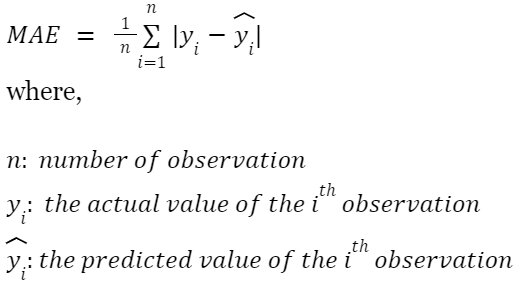
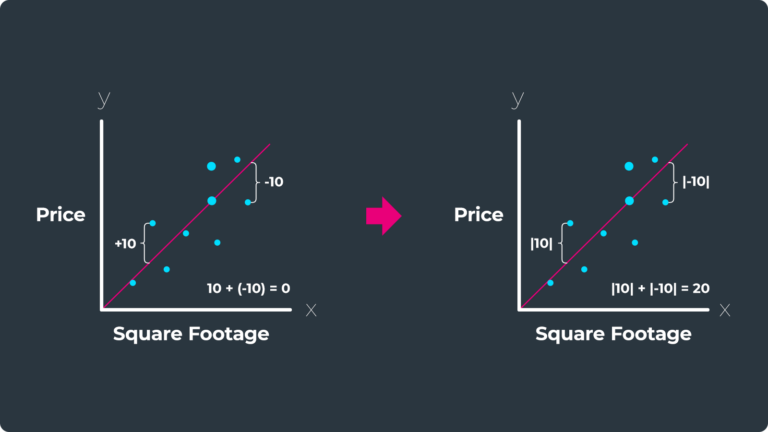

**Importance**
- **Resiliency to outliers** The MAE is not as impacted by extreme results as other metrics, such as Mean Squared Error (MSE), are. This makes it an appropriate measure for datasets that include outliers or extreme values.
- **Linear score**. All individual differences are given equal weight in the average. This makes it simple to compare the performance of several models or variations of the same model.
- **Straightforward**. The MAE interpretation is a basic and obvious statistic that represents the average magnitude of the forecasts’ mistakes. It is simple for non-technical stakeholders to comprehend.
- **Same units as the response variable**. The ML MAE is expressed in the same units as the response variable, making it simple to comprehend the size of the prediction error. This is important when trying to understand the performance of the model in the context of the issue you’re attempting to solve.
- **Used in several disciplines**. MAE is used in finance, engineering, and meteorology. It is even regarded as a standard measure in some instances.
- **Offer information about the size of the error**. MAE provides information about the magnitude of the error produced by the model. It allows for model comparison and the selection of the best one, as well as the improvement of a model by determining the predicted mean absolute percentage error.

 MAE is not differentiable at zero

#### MSE

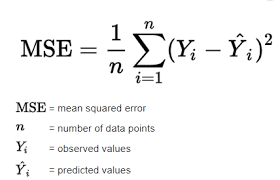

- **Quantifies Prediction Accuracy**: MSE provides a measure of how well the model’s predictions align with the actual data points. Lower MSE indicates better predictive accuracy.
- **Differentiable**: Being a differentiable function, MSE facilitates optimization algorithms such as gradient descent for model training.
- **Loss Function**: MSE is commonly used as a loss function in regression algorithms, guiding the learning process towards minimizing prediction errors.

if y unit is lpa then mse unit is lpa^2
it parralize outliers ie not robust to outliers

#### RMSE
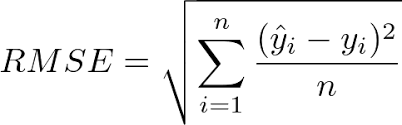

- differtiable graph
- same unit
- not much robust to outliers
- more imp in deep learning

#### R2 Score
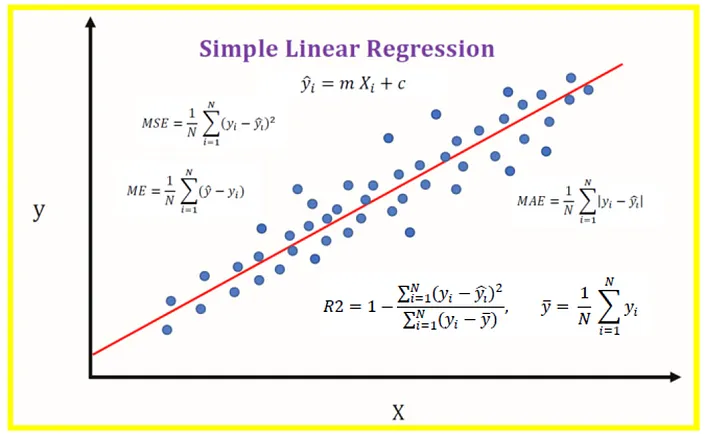

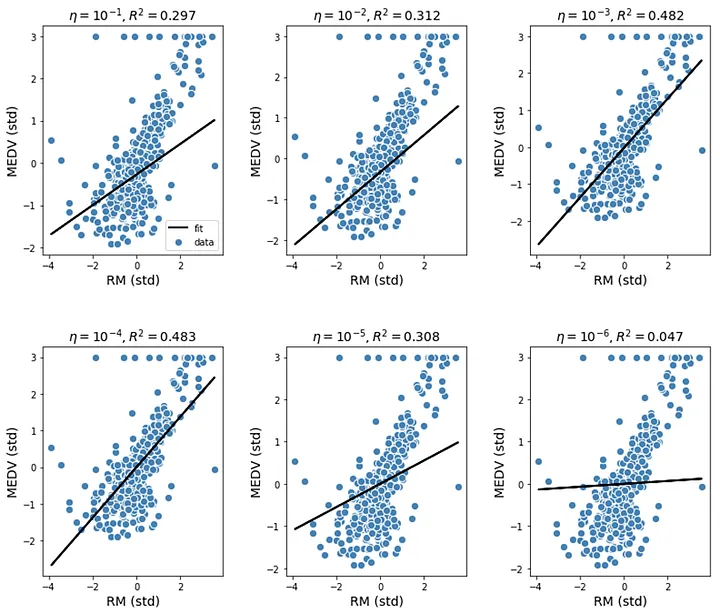

r2 score increase with parameters infact these are irrelevent column like placement  - iq cgpa + temp

### Adjusted R2 score
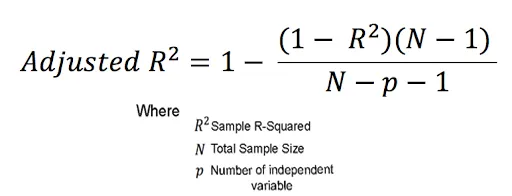

R-Squared value only works for simple linear regression. For multiple linear regression as the number of the independent variables increases, the value of R-Squared also gets increases even if the independent variable is insignificant. Whereas Adjusted R-squared increases only when the independent variable is significant and affects the dependent variable.
- Case 1: **When independent features are insignificant**
So as p increases the denominator (N-p-1) going to be a smaller term, it means that the whole [(1-R²)(N-1)/(N-p-1)] will become a large number and when this larger term is subtracted from 1 the value of Adjusted R² going to be a smaller term.


- Case 2:**When independent features are significant**
When features have some significance, the value of R² going to increase, and when larger R² is going to subtract from 1, (1-R²) becomes a smaller term. When we multiple smaller terms with [(N-1)/(N-p-1)] it will become a smaller term and at the last when the whole term is subtracted from 1 Adjusted R² is going to be a larger value.


When independent features are significant
Adjusted R-Squared is Negative or Zero

Adjusted R-Squared can be zero or negative in two conditions

R² is very small or close to zero. (You can put R²=0 in the Adjusted R-Squared formula and check by yourself.)
When N is less than or equal to p. (In a real-world scenario p is always smaller than N)

In [94]:
placement

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [95]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [96]:
y_pred=lr.predict(X_test)

c:\Users\Admin\Desktop\Arusa\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [97]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [98]:
print('MAE',mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [99]:
print('MSE',mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [100]:
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [101]:
print('R2 Score ',r2_score(y_test,y_pred))

R2 Score  0.780730147510384


In [102]:
# Adjusted R2 score
r2=r2_score(y_test,y_pred)
X_test.shape

(40, 1)

In [103]:
1-((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

### Multiple Linear Regression

In [104]:
!pip install plotly

In [105]:
from sklearn.datasets import make_regression
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [106]:
X,y=make_regression(n_samples=100,n_features=2,n_informative=2,n_targets=1,noise=50)

In [107]:
df=pd.DataFrame({'feature1':X[:,0],'feature2':X[:,1],'target':y})

In [108]:
df.shape

(100, 3)

In [109]:
df.head()

,feature1,feature2,target
0,0.947616,-1.588015,-102.515260
1,-0.724426,-0.516764,-91.514784
2,-1.300168,-2.388340,-307.582018
3,-0.743873,0.170437,-33.044393
4,-0.501966,1.918958,171.543606


In [110]:
fig=px.scatter_3d(df,x='feature1',y='feature2',z='target')

In [111]:
!pip install nbformat

In [112]:
import nbformat
print(nbformat.__version__)

5.10.4


In [113]:
fig.show()

In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [115]:
from sklearn.linear_model import LinearRegression

In [116]:
lr=LinearRegression()

In [117]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [118]:
y_pred=lr.predict(X_test)

In [119]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAE 51.12905291882869
MSE 3557.395807369655
R2 score 0.665042108088449


In [120]:
x=np.linspace(-5,5,10)
y=np.linspace(-5,5,10)
xGrid,yGrid=np.meshgrid(x,y)
final=np.vstack((xGrid.ravel(),yGrid.ravel())).T
z_final=lr.predict(final).reshape(10,10)

z=z_final



In [121]:
fig=px.scatter_3d(df,x='feature1',y='feature2',z='target')
fig = go.Figure(data=fig.data)
fig.add_trace(go.Surface(x=x,y=y,z=z_final,colorscale='Viridis',opacity=0.6))
fig.show()

In [123]:
lr.coef_

array([39.96767937, 74.80066597])

In [124]:
lr.intercept_

np.float64(1.8323163844619064)

## Mathmetical formulation 
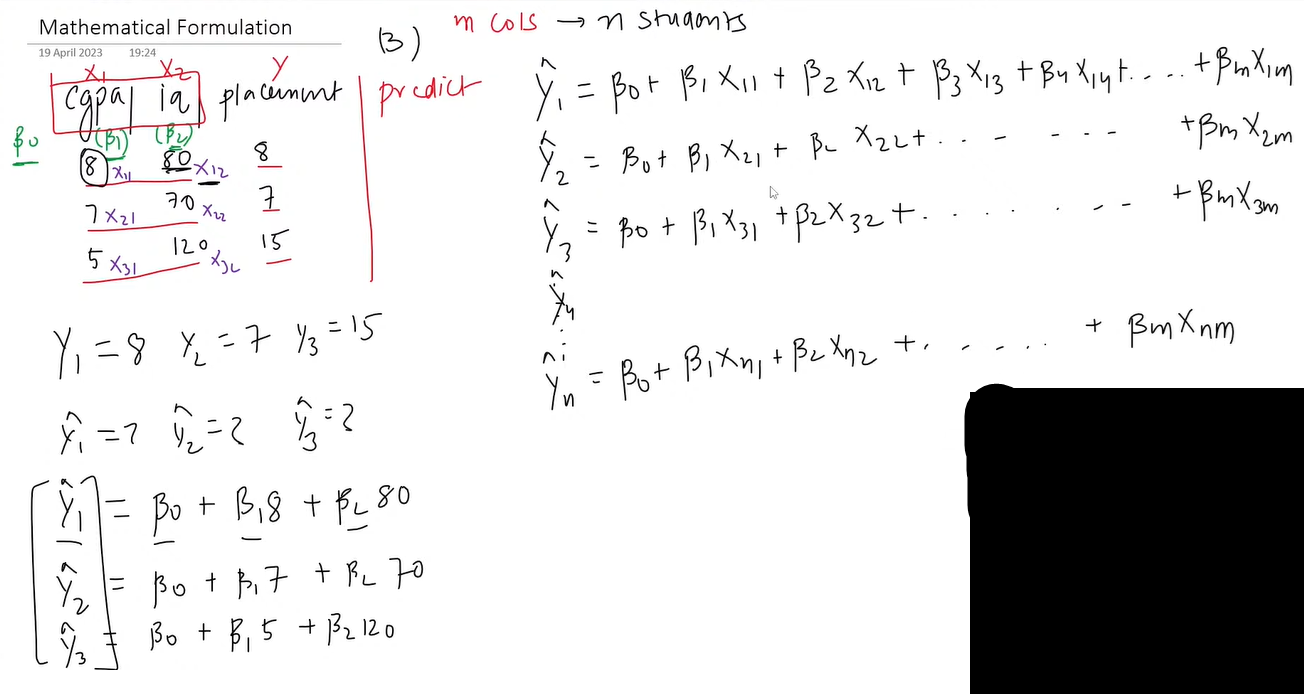
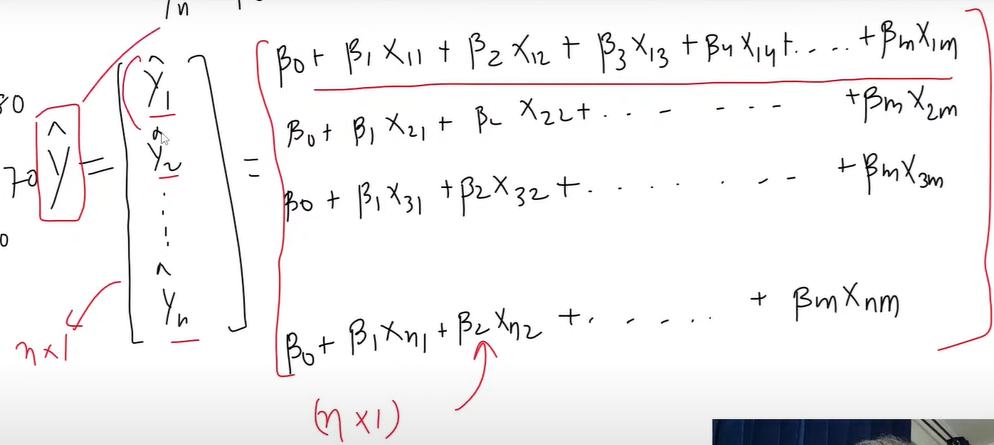
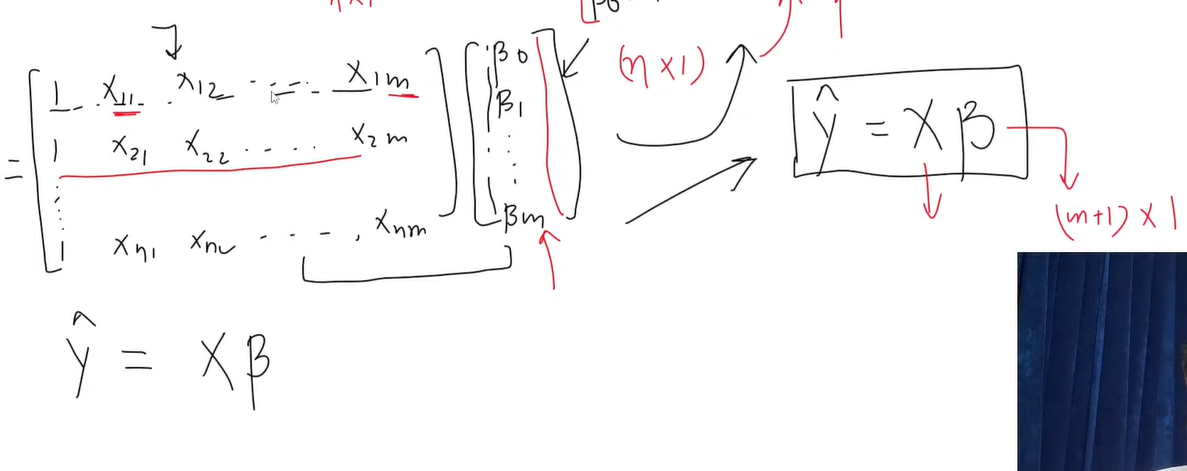
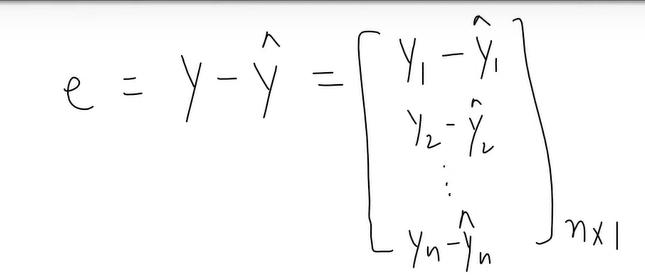

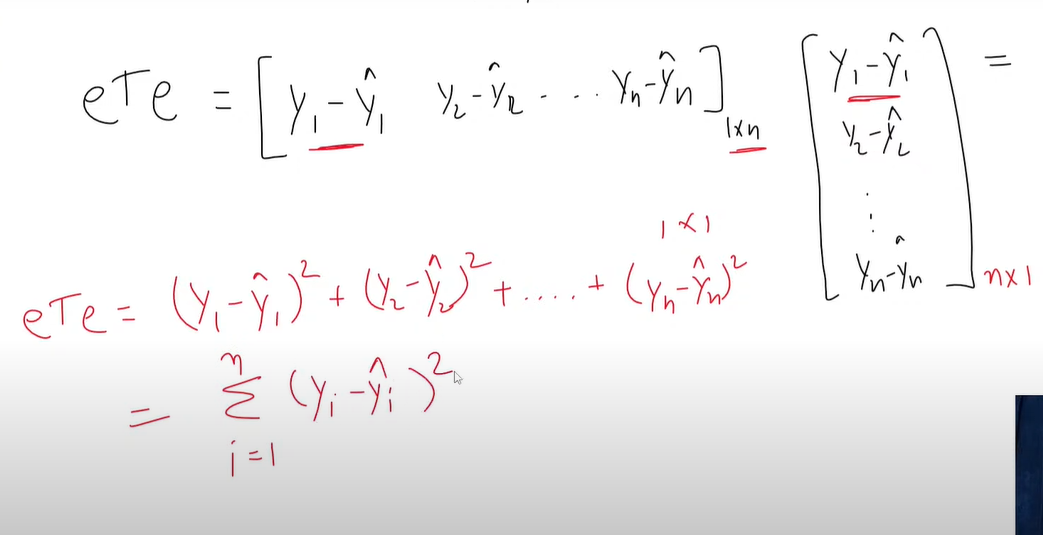
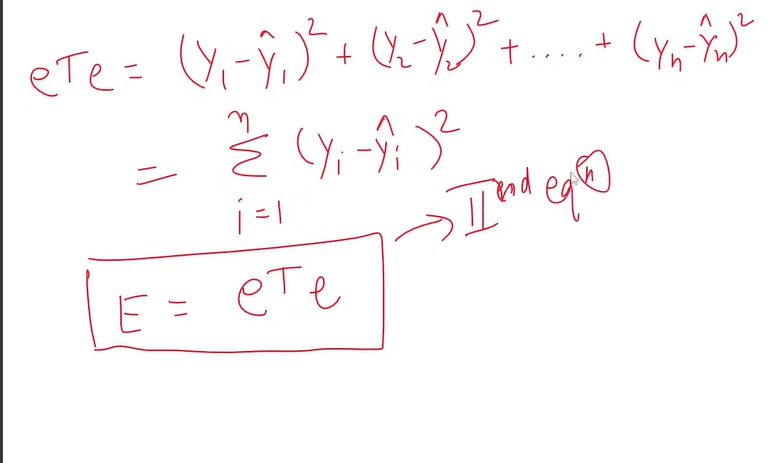